# Potable Water Correlation Analysis

In [1]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('water_potability.csv')

### Correlation assumptions

#### Normality Distribution Test 

The Shapiro–Wilk test helps to determine whether the data from a variable is normally distribuited or not. In this case, Python allows to do it through Scipy.   

In [13]:
df_shapiro = pd.DataFrame(columns = ['Variable','P-value','Sentence','Kurtosis'])
index = 0
for i in df.columns:
    if i == 'Potability':
        break
    df_NaN = df[df[i].notnull()]
    kurt = df_NaN[i].kurt()
    stats, p = scipy.stats.shapiro(df_NaN[i])
    index += 1
    if p < 0.05:
        sentence = 'Normal'
    else: 
        sentence = 'Not Normal'
    
    df_shapiro.loc[index] = [i,p,sentence,kurt]

df_shapiro = df_shapiro.round(decimals = 6)
df_shapiro

,Variable,P-value,Sentence,Kurtosis
1,ph,0.0,Normal,1.007935
2,Hardness,0.0,Normal,0.379520
3,Solids,0.0,Normal,-0.251250
4,Chloramines,0.0,Normal,0.286365
5,Sulfate,0.0,Normal,1.604200
6,Conductivity,0.0,Normal,-0.444588
7,Trihalomethanes,0.0,Normal,0.272728


Organic Carbon and Turbidity cannot be used for correlation analysis in potability since p-value is below 0.05. The hpothesis were:

H0: Variables do not follow a normal distribution
HA: Variables follow a normal distribution

With this test, a value below 0.05 means we do not accept our null hypothesis H0. 

### Outliers

#### Interquartile Range Rule

This rule is used in basic statistics to detect outliers in data sets. In this case, it has to be calculated for each variable. 

Interquartil Range (IQR) = Quartil 3 - Quartil 1

Every value less or greater than 1.5 IQR is considered an outlier. 

In [3]:
df = df.drop(['Organic_carbon','Turbidity'],axis=1)

Since our data is normally distributed, we can detect outliers and replace them for the mean.

In [4]:
outlier_counter = {}

In [5]:
for i in df.columns:
    if i == 'Potability':
        break
    
    Q1 = df[i].quantile(.25)
    Q3 = df[i].quantile(.75)
    IQR = (Q3 - Q1)*1.5
    lower = IQR - Q1
    upper = Q3 + IQR
    mean = df[i].mean()
    

    for x in df[i]:
        if x < lower or x > upper or pd.isna(x):
            df[i].replace(x,mean,inplace = True)
            
            if i in outlier_counter:
                outlier_counter[i] +=1
            else:
                outlier_counter[i] = 1

In [6]:
outliers = pd.DataFrame.from_dict(outlier_counter, orient = 'index').reset_index()
outliers.columns = ['Variable','Outliers']
outliers

,Variable,Outliers
0,ph,26
1,Hardness,39
2,Solids,52
3,Chloramines,30
4,Sulfate,21
5,Conductivity,10
6,Trihalomethanes,15


Text(0.5, 1.0, 'Outliers counting for each variable')

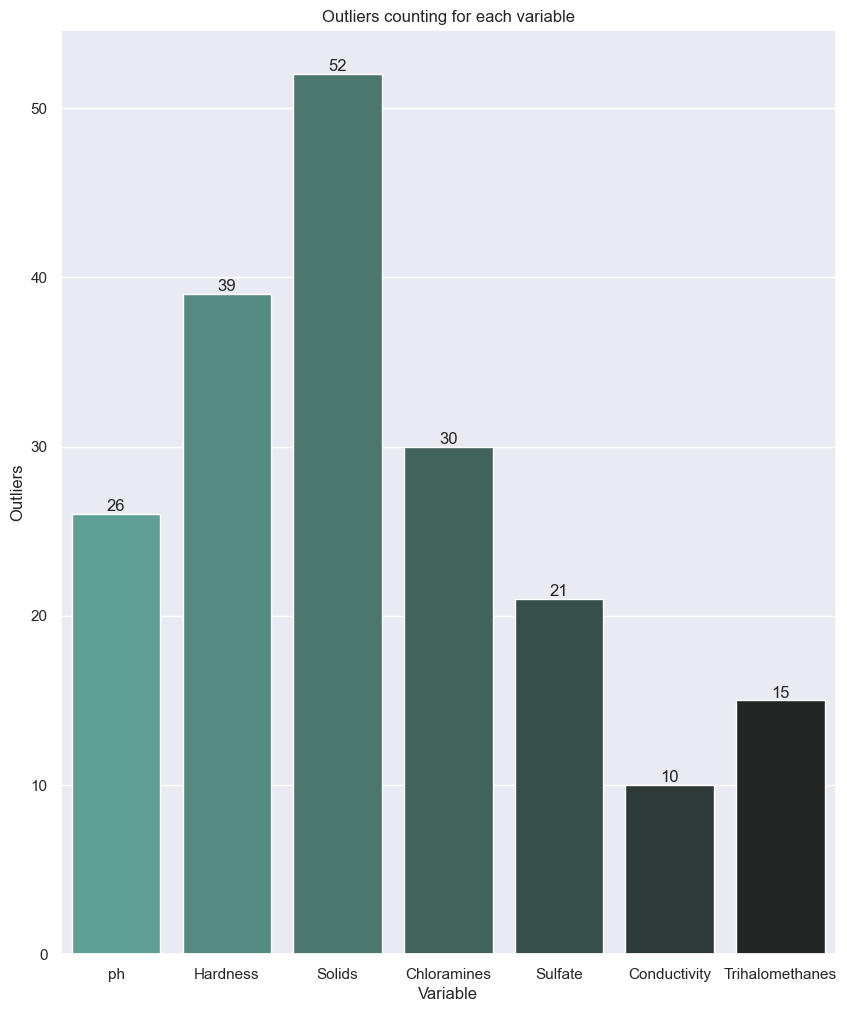

In [7]:
sns.set(rc={'figure.figsize':(10,12)})
barchart = sns.barplot(data=outliers, x='Variable', y='Outliers', palette='dark:#5A9_r')

for i in barchart.containers:
    barchart.bar_label(i,)

barchart.set_title("Outliers counting for each variable")

### Pearson Correlation Analysis

Once the assumptions are fulfilled. Let's see the correlation between variables with the variable we want to analyse: Potability

In [133]:
cormat = df.corr().round(2)

In [145]:
cm = np.corrcoef(cormat.values.T).round(2)

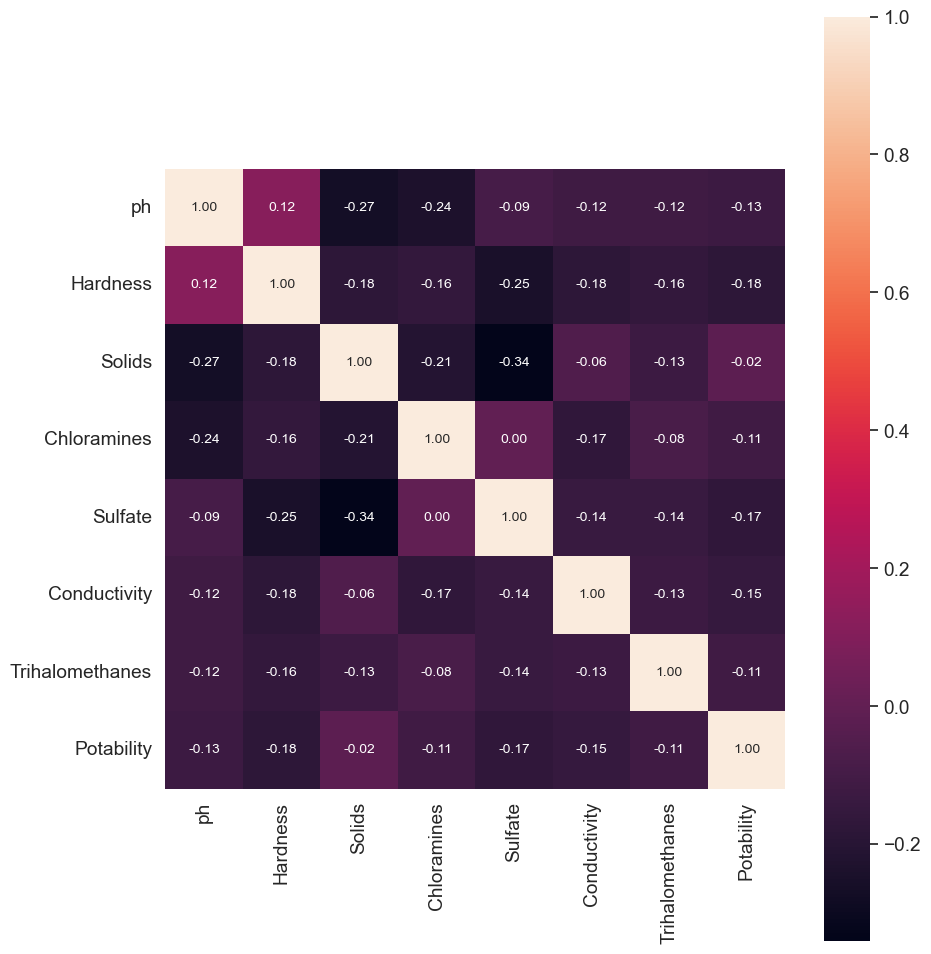

In [148]:
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar=True, annot = True, square = True, fmt = '.2f',annot_kws={'size':10},yticklabels = cormat.columns, xticklabels=cormat.columns)
plt.show()

#### Results

In the chart from above we can see that correlation between the dependent variable Potability and the independent variables is weak. In the other hand, we see there is a relation between some "independent" variables like sulfate-solids, ph-solids and ph-chloroamines. Even though is a weak relationship, this can drive out to wrong decisions to treat problems. 

So, why to perform this correlation analysis? Well, correlation does not mean causation. So, by solving, let's say, ph problem in water, this will not result in water being potable each time. However, is a good way to star attacking problems once you figured out the main issues that affect water potability.

In fact, ph can be a parameter for potability but ph can be also influenced by other parameters like chloroamines or solids which makes it more basic or acid. 